In [2]:
import scipy.io
import numpy as np
import pandas as pd
import time
import pickle
from sklearn.cluster import DBSCAN, OPTICS, cluster_optics_dbscan

#Opening and fixing the equilibria 
mat = scipy.io.loadmat('equilibria2.mat')
equilibria=mat["equilibria"]


#Decide on whether to create a model or to open one
load_existing_model=1
model_file_name="optics_model2.sav"

In [3]:
##Applying OPTICS##
if(load_existing_model==0):
    import pickle 
    min_samples=8
    t1=time.time()

    clustering = OPTICS(min_samples=min_samples, xi=0.05, n_jobs=3)
    clustering.fit(equilibria)
    t2=time.time()

    print("time",t2-t1)
    print(clustering)
    pickle.dump(clustering, open(model_file_name, 'wb'))

In [4]:
#Loading the model (in case the flag says so)
if(load_existing_model==1):
    clustering = pickle.load(open(model_file_name, 'rb'))

/home/nikos/.local/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator OPTICS from version 1.0.1 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Text(0.5, 1.0, 'Reachability Plot')

<Figure size 432x288 with 0 Axes>

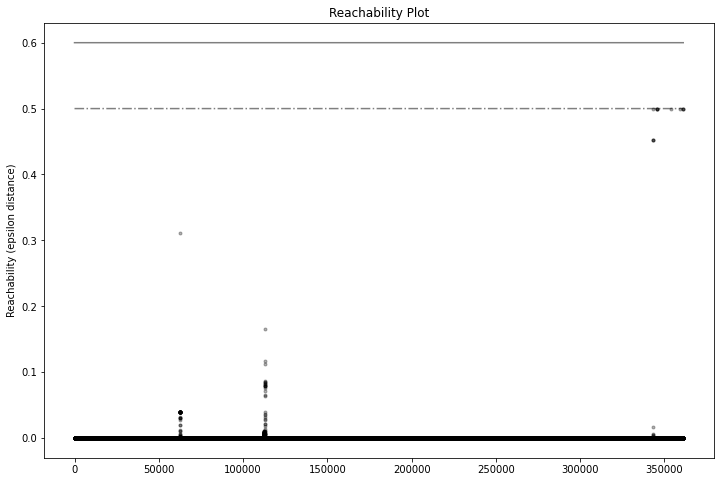

In [5]:
##Creating a reachability plot##
import matplotlib.pyplot as plt 
space = np.arange(len(equilibria))
reachability = clustering.reachability_[clustering.ordering_]
labels = clustering.labels_[clustering.ordering_]

# Reachability plot
fig1=plt.figure()
colors = ["g.", "r.", "b.", "y.", "c."]
plt.figure(figsize=(12, 8))
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    plt.plot(Xk, Rk, color, alpha=0.3)
plt.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
plt.plot(space, np.full_like(space, 0.6, dtype=float), "k-", alpha=0.5)
plt.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
plt.ylabel("Reachability (epsilon distance)")
plt.title("Reachability Plot")

In [6]:
##After looking at the y axis, we make a decision about the eps parameter for the dbscan##
eps_chosen=0.1

#Actually Applying DBSCAN:
my_labels = cluster_optics_dbscan(
    reachability=clustering.reachability_,
    core_distances=clustering.core_distances_,
    ordering=clustering.ordering_,
    eps=eps_chosen,
)

min_label=np.min(my_labels)
max_label=np.max(my_labels)

#Saving the labels
my_labels=pd.DataFrame(my_labels)
my_labels.to_csv("my_labels.csv")

Text(0.5, 0.92, 'Plot of the whole results')

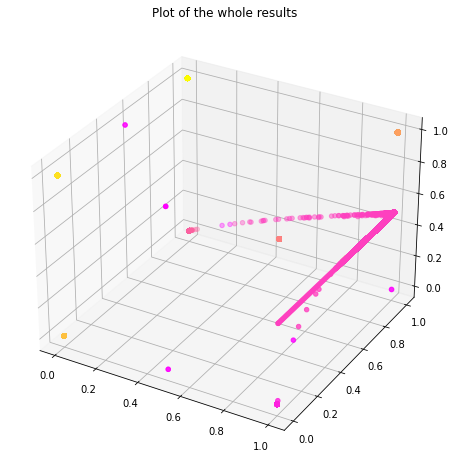

In [7]:
##Plotting the results##
#This is done after the analysis, so that we can see how well the clustering process went
plt.figure(figsize=(12, 8))
ax = plt.axes(projection ="3d")
ax.scatter3D(equilibria[:,0], equilibria[:,1], equilibria[:,2], c=my_labels, cmap="spring")
plt.title("Plot of the whole results")


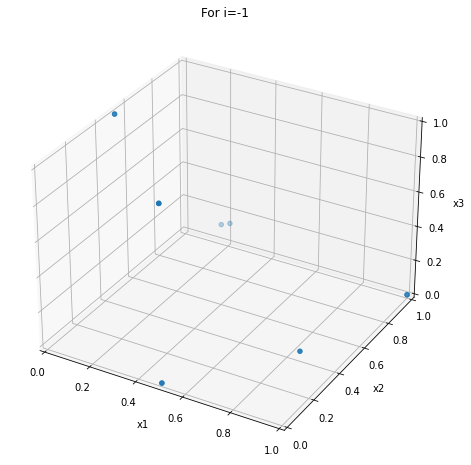

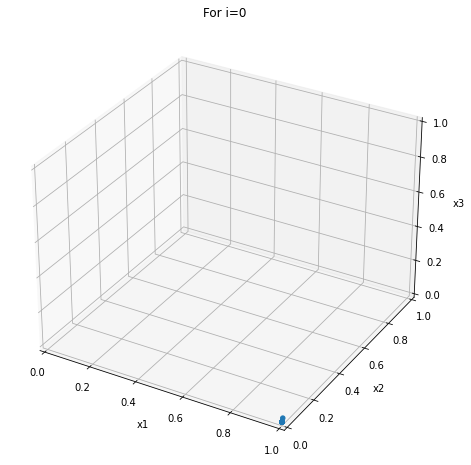

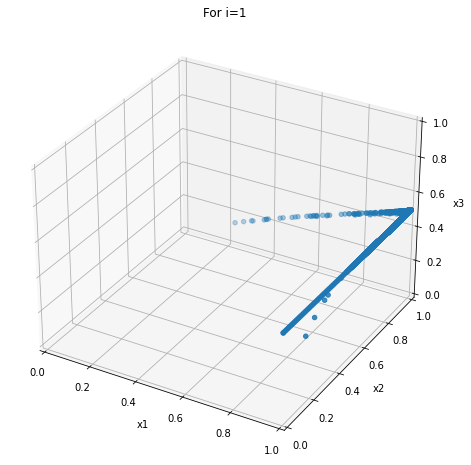

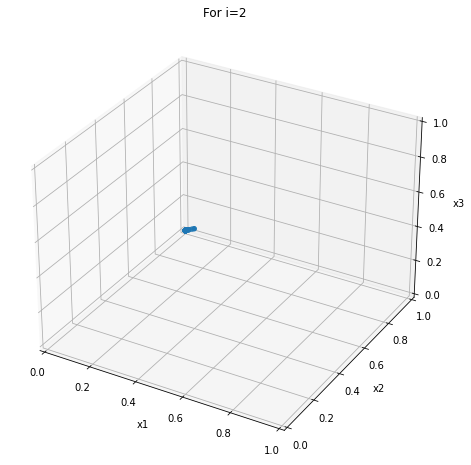

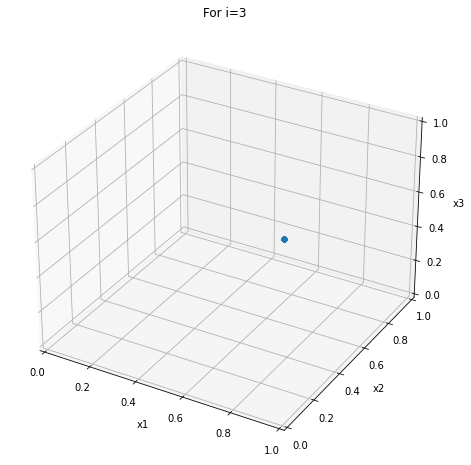

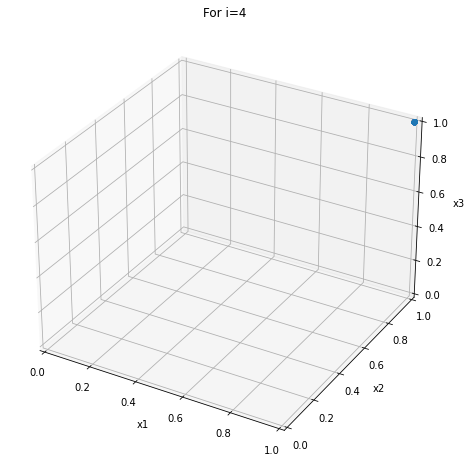

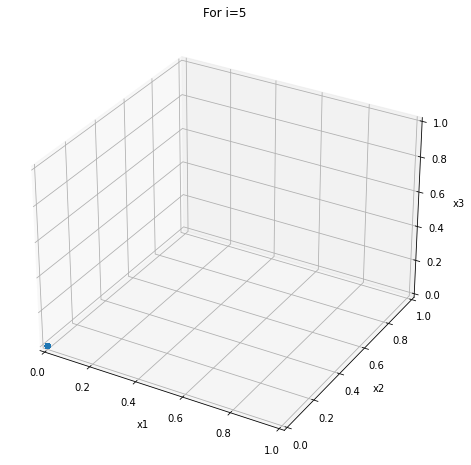

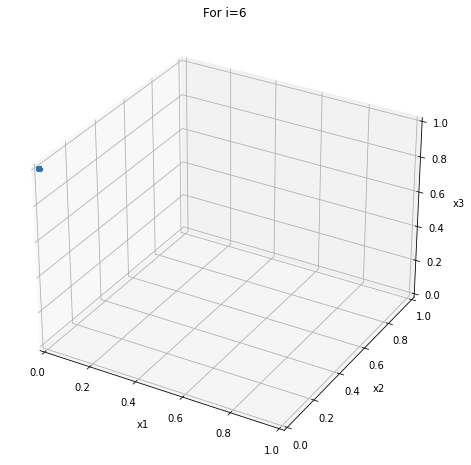

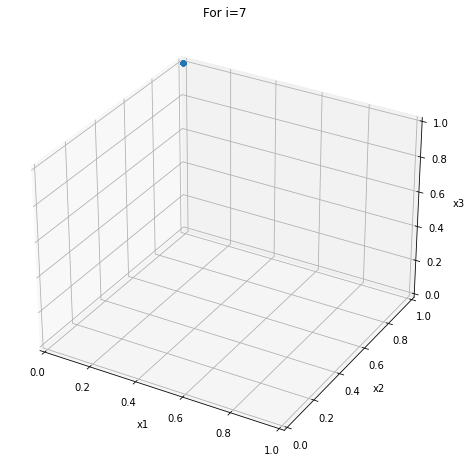

In [9]:
#Now plotting every single different cluster
for i in range(min_label, max_label+1):
    current_indices=np.where(my_labels==i)[0]
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection ="3d")
    plt.title("For i=%d" % (i))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    ax.scatter3D(equilibria[current_indices, 0], equilibria[current_indices, 1], equilibria[current_indices, 2])
    plt.show()
#Finished plotting

